# Reaction Rates

In this notebook, we will teach how to assign custom rates based on the meta-species states. 
Let us start with the basic definitions.

In [1]:
from mobspy import *

Age, Mortal, Infectable, Virus = BaseSpecies()
Replicator = New(Age)

Age.young >> Age.old [1]

For any meta-reaction if a number is returned MobsPy will automatically construct the reaction rate using mass-action kinetics if the model is deterministic and propensity expressions if the model is stochastic. The number returned will be the rate constant used to construct this reaction.

We now define a replication reaction with a higher rate for old individuals. To archive this, one can pass a function as a rate instead of a number. One can also query for the characteristics of the reactants inside the function.

In [2]:
Replicator >> 2*Replicator.young [lambda r1: 2 if r1.old else 1]

If a function is passed as a rate MobsPy will pass the meta-species states to the arguments of this function. In the replicator reaction above, the first argument of the function r1 will receive the first meta-species and if it is in the young state it will return the rate 2.

To continue we will define three tipes of Cells - C1, C2, and C3 - and two types of viruses - V1, V2. 

In [3]:
Cell = Infectable*Age*Mortal
C1, C2, C3 = New(Cell)
V1, V2 = New(Virus)

We now wish to define infection reaction with rates that depend on the type of Cell and Virus used. In this case the user has two options and we will list both here. 
The first one uses the method .is_a(meta species) which returns true if the reactant is or inherits from the given meta-species passed as an argument.

In [4]:
infection_dict = {'C1':{'V1':1.1 , 'V2':1.3 , 'V3':1.7}, 
                  'C2':{'V1':1.4 , 'V2':1.1 , 'V3':1.9},
                  'C3':{'V1':1.9 , 'V2':1.2 , 'V3':1.6}}    
    
def infection_rate_1(r1, r2): 
    factor = 1
    if r1.is_a(C1):
        factor = 1.1*factor
    else:
        factor = 1.2*factor
    
    if r2.is_a(V1):
        factor = 0.8*factor
    elif r2.is_a(V2):
        factor = 1.1*factor
    else:
        factor = 1.2*factor
    
    print(f'The reactants {r1} and {r2} yield a rate constant of: {factor}')
    return factor
    

Infectable.not_infect + Virus >> Infectable.infected [infection_rate_1]

S_test = Simulation(C1 | C2 | C3 | V1 | V2)
S_test.compile(verbose=False)

The reactants C1_dot_not_infect_dot_old and V2 yield a rate constant of: 1.2100000000000002
The reactants C1_dot_not_infect_dot_young and V2 yield a rate constant of: 1.2100000000000002
The reactants C1_dot_not_infect_dot_old and V1 yield a rate constant of: 0.8800000000000001
The reactants C1_dot_not_infect_dot_young and V1 yield a rate constant of: 0.8800000000000001
The reactants C2_dot_not_infect_dot_old and V2 yield a rate constant of: 1.32
The reactants C2_dot_not_infect_dot_young and V2 yield a rate constant of: 1.32
The reactants C2_dot_not_infect_dot_old and V1 yield a rate constant of: 0.96
The reactants C2_dot_not_infect_dot_young and V1 yield a rate constant of: 0.96
The reactants C3_dot_not_infect_dot_old and V2 yield a rate constant of: 1.32
The reactants C3_dot_not_infect_dot_young and V2 yield a rate constant of: 1.32
The reactants C3_dot_not_infect_dot_old and V1 yield a rate constant of: 0.96
The reactants C3_dot_not_infect_dot_young and V1 yield a rate constant of: 0

Compiling model


Note that 'dot' replaces '.' in the provided names as sbml files do not accept '.' in the species names.

Another method is to use the string form of the reactant states. As you might have seen from the provious code, the reactants take the form of Name_dot_characteristic1_dot_characteristic2. This is due to sbml syntax incompatibility with dots in the 

In [5]:
# Reset reactions to remove previously added reaction
#Infectable.reset_reactions()
#Virus.reset_reactions()

#infection_dict = {'C1':{'V1':1.1 , 'V2':1.3 , 'V3':1.7}, 
#                  'C2':{'V1':1.4 , 'V2':1.1 , 'V3':1.9},
#                  'C3':{'V1':1.9 , 'V2':1.2 , 'V3':1.6}}


# def infection_rate_2(r1, r2): 
#    rate = infection_dict[r1.get_name()][r2.get_name()]
#    print(f'Reactants {r1} and {r2} yielded a rate of {rate}')
#    return rate
    

#Infectable.not_infect + Virus >> Infectable.infected [infection_rate_2]

#S_test = Simulation(C1 | C2 | C3 | V1 | V2)
#S_test.compile(verbose=False)


If one wishes to assign rates other than mass action kinetics, one can pass a function that returns a string containing the rate expression to be used. For instance, in the model bellow we use the hill function as an activatior for the production of a meta-species P.

Compiling model
Starting Simulator
Running simulation in parallel
Simulation is Over


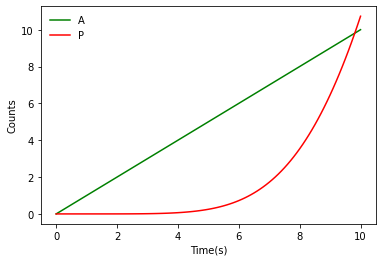

In [6]:
A, P = BaseSpecies()

Zero >> A [1]
A >> A + P [lambda r1: f'{r1}/(1 + (10/{r1})^4)']

S = Simulation(A | P)
S.duration = 10
S.run()

As a final note, for custom string rates, MobsPy, like COPASI, only accepts meta-species which are part of the reactants of a reaction for the construction of the rate expression. If there is a species which is not a reactant in the rate expression the model will produce a compilation error.